<a href="https://colab.research.google.com/github/orenStern2/ANN/blob/master/Section_05_03_multiclass_CNN_FOOD_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-18 09:46:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   323MB/s    in 1.5s    

2022-07-18 09:46:43 (323 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [5]:
# Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
    # Setup the target directory 
    target_folder = target_dir + target_class
    
    # Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot ot using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['1155469.jpg']
Image shape: (384, 512, 3)


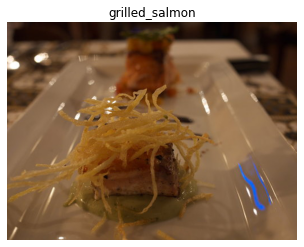

In [8]:
# Visualize, Visualize, Visualize

import random 
img = view_random_images(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [9]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    import matplotlib.pyplot as plt
    """
    Return separate loss curves for trainig and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs did we run for
    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend();

In [10]:
# Creating new data with augemntation
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.3,
                                   shear_range=2,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,                   
                                   channel_shift_range=0.3
                                  )

test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True,
                                               target_size=(224,224)
                                              )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                            )


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [16]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])


model_4.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
               )

history_4 = model_4.fit(train_data,
                        epochs=27,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= len(test_data)
                       )

Epoch 1/27
235/235 [==============================] - 116s 494ms/step - loss: 2.2344 - accuracy: 0.1721 - val_loss: 2.0319 - val_accuracy: 0.2908
Epoch 2/27
235/235 [==============================] - 116s 495ms/step - loss: 2.1364 - accuracy: 0.2347 - val_loss: 2.0116 - val_accuracy: 0.2904
Epoch 3/27
235/235 [==============================] - 114s 487ms/step - loss: 2.1041 - accuracy: 0.2479 - val_loss: 1.9209 - val_accuracy: 0.3272
Epoch 4/27
235/235 [==============================] - 114s 485ms/step - loss: 2.0646 - accuracy: 0.2711 - val_loss: 1.9929 - val_accuracy: 0.3048
Epoch 5/27
235/235 [==============================] - 114s 486ms/step - loss: 2.0406 - accuracy: 0.2841 - val_loss: 1.8660 - val_accuracy: 0.3672
Epoch 6/27
235/235 [==============================] - 114s 485ms/step - loss: 1.9900 - accuracy: 0.3077 - val_loss: 1.7833 - val_accuracy: 0.4012
Epoch 7/27
235/235 [==============================] - 114s 484ms/step - loss: 1.9648 - accuracy: 0.3145 - val_loss: 1.8253 -

In [ ]:
model_4.evaluate(test_data)

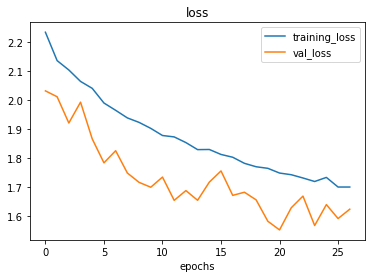

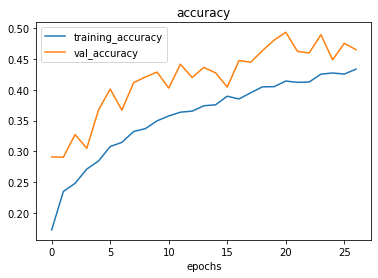

In [17]:
# Check the lost curves

plot_loss_curves(history_4)

In [18]:
model_4.save("food_vision_CNN_clab")

INFO:tensorflow:Assets written to: food_vision_CNN_clab/assets


In [19]:
!zip -r /content/food_vision_CNN_clab.zip /content/food_vision_CNN_clab

updating: content/food_vision_CNN_clab/ (stored 0%)
updating: content/food_vision_CNN_clab/assets/ (stored 0%)
updating: content/food_vision_CNN_clab/variables/ (stored 0%)
updating: content/food_vision_CNN_clab/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/food_vision_CNN_clab/variables/variables.index (deflated 67%)
updating: content/food_vision_CNN_clab/keras_metadata.pb (deflated 91%)
updating: content/food_vision_CNN_clab/saved_model.pb (deflated 89%)


In [20]:
from google.colab import files
files.download('food_vision_CNN_clab.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section